# K-Means Application : Image Segmentation

### Import the necessary libraries

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

### Read the image file and convert it to NumPy Array

In [33]:
def ReadImage(img_file):
    img_arr = mpimg.imread(img_file)
    plt.imshow(img_arr)
    return(img_arr)

(553, 830, 3)
(553, 830)


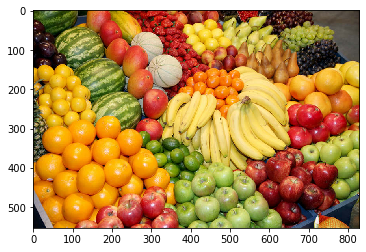

In [34]:
image_arr = ReadImage("./fruits.jpg")
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)

###  Assign random labels to individual pixels 

In [40]:
K = 7 ## K is the number of clusters that we want to create 

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr)

[[2. 3. 4. ... 2. 3. 0.]
 [6. 2. 0. ... 2. 2. 1.]
 [2. 0. 4. ... 3. 1. 4.]
 ...
 [3. 3. 3. ... 5. 6. 2.]
 [3. 5. 2. ... 1. 3. 3.]
 [6. 4. 1. ... 1. 1. 6.]]


### Define the $p^{th}$ order distance metric

The Minkowski distance of order $p$ (where $p$ is an integer) between two points

$X=(x_{1},x_{2},\ldots ,x_{n})$ and $Y=(y_{1},y_{2},\ldots ,y_{n})$ $\in \mathbb {R} ^{d}$ is defined as:

$$ D\left(X,Y\right)=\left(\sum _{i=1}^{d}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}} $$

In [41]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [42]:
def init_mean(K,img_arr,label_arr):
    mean_ls = [] ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

### Update labels by comparing distances with previous mean values and generate new labels

In [43]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist) ## Put the distance values in a list
            dist_arr = np.array(dist_ls) ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [44]:
def mean_from_label(K,prev_mean,img_arr,label_arr):##label array is the current label array
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)##np.ravel to flatten the vector
    new_mean = prev_mean
    return(new_mean)    

### Run the K-Means Algorithm and obtain the final labels and means

In [45]:
##it takes all the funcutions
def KMeans(img_arr,label_arr,K,p,maxIter):##initial mean
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)##new mean
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)
        print("The mean obtained at {}th iteration is {}\n".format(t,mean_new))
        label_arr = new_label_arr ## Update the label array
        mean_old = mean_new ## Update the mean values
    return(mean_new,label_arr)

In [50]:
mean_new,label_arr = KMeans(image_arr,label_arr,K,1,3)#1 is the value of p
                                                       #3 is the iteration

The mean obtained at 0th iteration is [array([80.74457019, 79.51808985, 34.10079447]), array([169.15593546, 155.18561273,  67.82528624]), array([183.73962997,  59.55034994,  30.59920953]), array([55.77954365, 19.14189629, 13.44738555]), array([235.92567259, 153.43306278,  15.86861662]), array([228.72888033, 201.37097836, 113.99336986]), array([110.00532623, 115.33265048,  57.3435078 ])]

The mean obtained at 1th iteration is [array([78.77933773, 79.92227878, 41.25699183]), array([170.9755394 , 158.31040564,  72.6295637 ]), array([184.15527746,  61.01239588,  30.99368363]), array([58.5947883 , 19.38692899, 12.93989841]), array([235.28501528, 152.48698282,  15.75921835]), array([230.08170079, 201.99851274, 113.63827084]), array([115.27863777, 121.07606322,  49.55998045])]

The mean obtained at 2th iteration is [array([77.84528034, 80.10203636, 46.08292843]), array([173.6254423 , 160.65971522,  76.6431514 ]), array([184.46130764,  61.78415193,  31.34266425]), array([60.40223053, 19.526447

### Use the finally obtained mean and labels to segment the image

In [51]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image)

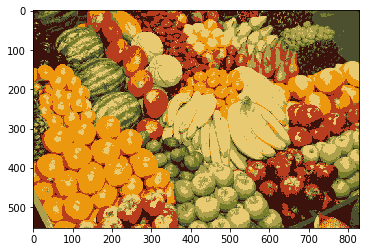

In [52]:
segmentImage(image_arr,label_arr,mean_new)